# Tarea S16 - Arias Carlos - Sanabria Hans

## Parte 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

#### Operador de incialización

In [2]:
def Inicializacion(nCiudades=100, poblacion=10):
    matriz=np.zeros(shape=(poblacion,nCiudades))
    for i in range(poblacion):
        adicion=np.arange(nCiudades)
        np.random.shuffle(adicion)
        matriz[i]=adicion
    return matriz
a=Inicializacion()

#### Operador de obtención de coordenadas

In [3]:
def Coordenadas(ciudades):
    """
    Entradas: 
        ciudades: Array 1 D con la secuencia de ciudades
    return: 
        Array 2D de forma (coord X, Coord Y) con filas en el orden de la secuencia
        de ciudades
    """
    pares=np.zeros(shape=(len(ciudades),2))
    for i in range(len(ciudades)):
        pares[i,0]=0.1*((9+13*(ciudades[i]+1)**2)//200)
        pares[i,1]=0.1*((7+1327*(ciudades[i]+1))//200)
    return pares
#Coordenadas(Inicializacion()[1])

#### Operador de cálculo del ajuste

In [4]:
def Ajuste(pares):
    """
    Entradas: 
        Pares: Array con las coordendas de cada ciudad generedas con Coordenadas()
    return: 
        Escalar con el valor de ajuste para una secuencia de ciudades
    """
    suma=0
    for i in range(len(pares)-1):
        d=((pares[i,0]-pares[i+1,0])**2+(pares[i,1]-pares[i+1,1])**2)**0.5 #Fórmula de distancia entre puntos 
        suma+=d                                                   
    d=((pares[len(pares)-1,0]-pares[0,0])**2+(pares[len(pares)-1,1]-pares[0,1])**2)**0.5 #condición de retorno a la primera
                                                                                         #ciudad
    suma+=d
    return 1/suma
#Ajuste(Coordenadas(Inicializacion()))

#### Operador de mutación sobre el individuo

In [5]:
def Mutacion(ciudades, p_mut, inicio=0):
    """
    Entradas: 
        ciudades: Array 1D con el orden de las ciudades actual
        p_mut: probabilidad de mutación
        inicio: Alteración para implementación con la segunda parte de la tarea, permite 
        cambiar a partir de donde sí se pueden cambiar ciudades
    return: 
        Escalar con el valor de ajuste para una secuencia de ciudades
    """
    index1=np.random.randint(inicio, len(ciudades))
    index2=np.random.randint(inicio, len(ciudades))
    while index2==index1: #Restricción de que un individuo no mute consigo mismo
        index2=np.random.randint(inicio, len(ciudades))
    copia=np.copy(ciudades)
    if np.random.random()<p_mut:
        copia[index1]=ciudades[index2]
        copia[index2]=ciudades[index1]
    return copia
#Mutacion(Inicializacion(nCiudades=10), 1)

#### Algoritmo genético de optimización

In [6]:
def Optimizacion(matriz, iteraciones=1000, p_mut=0.5, inicio=0):
    """
    Entradas: 
        matriz: Array 2D de forma(trayectorias, ciudades)
        p_mut: probabilidad de mutación
        iteraciones: Cantidad de generaciones a considerar, cantidad de posibles mejoras sobre la 
        polación inicial
        inicio: Misma variable para el operador de mutación
    Return: 
        mejoresOrdenes: Array 2D, de forma (ciudades, ordenes de cada ciudad). Solo incluye las mejoras
        sobre la población anterior
        mejoresAjustes: Array 1D con los ajustes de todas las iteraciones
        ajustesPromedio: Array 1D con los ajustes promedio de las poblaciones cada iteracion
    """ 
    matrizActual=matriz
    nCiudades=np.shape(matriz)[1]
    poblacion=np.shape(matriz)[0]
    mejoresOrdenes=np.zeros(shape=(1, nCiudades))
    ajustesOrg=np.zeros(poblacion)
    
    for j in range(poblacion):
        ajustesOrg[j]=Ajuste(Coordenadas(matriz[j,:]))
        
    elitismo=np.where(ajustesOrg==np.max(ajustesOrg))[0]
    mejoresOrdenes[0,:]=matriz[elitismo,:]
    mejoresAjustes=np.zeros(iteraciones)
    ajustesPromedio=np.zeros(iteraciones)
    
    for i in range(iteraciones): #Ciclo de las generaciones
        ajustesOrg=np.zeros(poblacion)
        ajustesMut=np.zeros(poblacion)
        mutado=np.copy(matrizActual)
        
        for j in range(poblacion):
            mutado[j,:]=Mutacion(matrizActual[j,:], p_mut, inicio)
            ajustesOrg[j]=Ajuste(Coordenadas(matrizActual[j,:]))
            ajustesMut[j]=Ajuste(Coordenadas(mutado[j,:]))
            
        ajustesPromedio[i]=np.average(ajustesOrg)
        mejoresAjustes[i]=np.max(ajustesOrg)
        nuevaPoblacion=Inicializacion(nCiudades,poblacion)
        
        if max(ajustesOrg)>max(ajustesMut):
            elitismo=np.where(ajustesOrg==np.max(ajustesOrg))[0]
            nuevaPoblacion[0,:]=matrizActual[elitismo, :]
            mejoresOrdenes=np.append(mejoresOrdenes, matrizActual[elitismo, :], axis=0)
        elif max(ajustesOrg)<max(ajustesMut):
            elitismo=np.where(ajustesMut==np.max(ajustesMut))[0]
            nuevaPoblacion[0,:]=mutado[elitismo, :]
            mejoresOrdenes=np.append(mejoresOrdenes, mutado[elitismo, :], axis=0)
        else:
            elitismo=np.where(ajustesOrg==np.max(ajustesMut))[0]
            nuevaPoblacion[0,:]=matrizActual[elitismo, :]
        matrizActual=nuevaPoblacion
    return mejoresOrdenes, mejoresAjustes, ajustesPromedio

salida=Optimizacion(Inicializacion())

### Resultados de primera parte

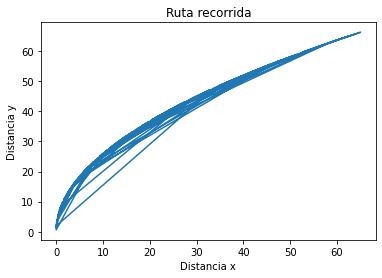

In [7]:
secuencia=salida[0] # El elemento 0 es el orden de las ciudades en cada generación que se mejora
for i in range(len(secuencia)):
    ciudades=secuencia[i]
    coord=Coordenadas(ciudades)
    plt.plot(coord[:, 0], coord[:,1])
    plt.xlabel('Distancia x')
    plt.ylabel('Distancia y')
    plt.title('Ruta recorrida')
    plt.show()
    clear_output(wait=True) #Con esto se logra la animación. Esta animación funciona en Google Colab y Jupyter

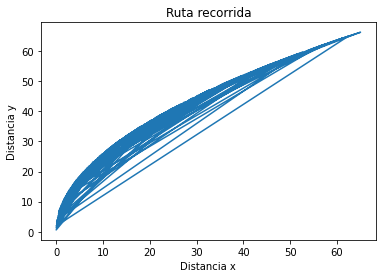

In [8]:
#Esta es la grafica del camino inicial
ciudades=salida[0][0]
coord=Coordenadas(ciudades)
plt.plot(coord[:, 0], coord[:,1])
plt.xlabel('Distancia x')
plt.ylabel('Distancia y')
plt.title('Ruta recorrida')
plt.show()
clear_output(wait=True) 

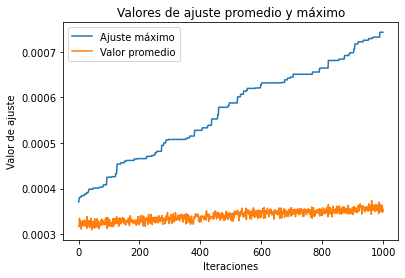

Valor maximo:  0.0007426824632251292 Valor minimo:  0.0003712580172059623 Distancia mínima:  1346.4704628374539 Distancia máxima:  2693.544526057282


In [9]:
valoresMaximos=salida[1] #El elemento 1 son los ajustes de todas las iteraciones, mejores o iguales. 
valoresPromedio=salida[2]
plt.plot(valoresMaximos, label='Ajuste máximo')
plt.plot(valoresPromedio,label='Valor promedio')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de ajuste')
plt.title('Valores de ajuste promedio y máximo')
plt.legend(loc='best')
plt.show()
print('Valor maximo: ', np.max(valoresMaximos),'Valor minimo: ', np.min(valoresMaximos), 'Distancia mínima: ', 1/np.max(valoresMaximos),
     'Distancia máxima: ', 1/np.min(valoresMaximos))

In [10]:
print(secuencia[-1])

[34.  0.  4. 33. 68. 25.  7. 12. 65. 70. 69. 67. 55. 59. 90. 71.  2. 11.
  9.  6. 26. 27. 84. 87. 79. 53. 31. 21. 13. 10. 14.  1.  3.  8. 40. 29.
 60. 61. 64. 58. 45. 94. 97. 89. 91. 96. 98. 93. 51. 50. 38. 77. 76. 72.
 95. 99. 92. 78. 62. 63. 56. 88. 73. 52. 54. 20. 15. 16. 30. 82. 85. 74.
 86. 46. 47. 43. 41. 42. 44. 48. 49. 37. 66. 80. 83. 81. 75. 24. 18. 17.
 23. 36. 57. 39. 19.  5. 22. 28. 32. 35.]


## Parte 2

#### Operador de inicialización alterado

In [11]:
def InicializacionM(ciudadesOrig, nCiudades=100):
    """
    Entradas: 
        nCiudades: Cantidad de ciudades que voy a trabajar, por defecto 100
    Return: 
        array: Arreglo con el orden de las ciudades, cada ciudad que sigue es la más cercana a la anterior
    """ 
    pares=np.zeros(shape=(nCiudades,2))
    for i in range(nCiudades): #Pares ordenado para el orden original de ciudades [0,1,2,...,99]
        pares[i,0]=0.1*((9+13*(ciudadesOrig[i]+1)**2)//200)
        pares[i,1]=0.1*((7+1327*(ciudadesOrig[i]+1))//200)
    aleatorio=np.random.randint(0,nCiudades) #Punto de inicio aleatorio
    array=np.zeros(nCiudades) #Este es el array de retorno
    array[0]=aleatorio
    actual=aleatorio #Actual empieza siendo aleatorio, este pasa siendo la ciudad de referencia en cada iteración
    
    exclusion=np.array(actual) #En este array entran las ciudades que ya han sido colocadas en array
    distancias=np.zeros(nCiudades) 
    for i in range(1, nCiudades):
        distancias[actual]=100000000 #Con esto las ciudades en exclusión no son consideradas cuando se saca "elección"
        for j in range(nCiudades): #Se calcula un array con las distancias a la ciudad actual cada iteración
            if j not in exclusion:
                d=((pares[j,0]-pares[actual,0])**2+(pares[j,1]-pares[actual,1])**2)**0.5
                distancias[j]=d
     #   print(distancias)
        eleccion=np.where(distancias==np.min(distancias))[0][0] #Escojo el índice (que correponde a la ciudad)
        array[i]=eleccion #Actualiza las variables en trabajo
        actual=eleccion
        exclusion=np.append(exclusion, actual)
        #print(array)
    #print(exclusion)
    return array
#a=InicializacionM()
#print(a)
a=np.arange(100)
print(InicializacionM(a))
                   

[87. 86. 85. 84. 83. 82. 81. 80. 79. 78. 77. 76. 75. 74. 73. 72. 71. 70.
 69. 68. 67. 66. 65. 64. 63. 62. 61. 60. 59. 58. 57. 56. 55. 54. 53. 52.
 51. 50. 49. 48. 47. 46. 45. 44. 43. 42. 41. 40. 39. 38. 37. 36. 35. 34.
 33. 32. 31. 30. 29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16.
 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


#### Operador de mutación, alteración de la población inicial

In [12]:
def MutacionM(ciudades,p_mut=1, inicio=1):
    """
    Entradas: 
        Ciudades: Array de orden de ciudades
        p_mut: Probabilidad de mutación
        inicio: Variable que permite que la primera ciudad de "ciudades" no se mute
    Return: 
        ciudades: array de las ciudades que sufrió el cambio de mutación
    """ 
    veces=np.random.randint(3,11)
    for i in range(veces):
        ciudades=Mutacion(ciudades, p_mut, inicio) #Esto sucede entre 3 y 10 veces
    return ciudades
#a=InicializacionM()
#print(a)
#print(MutacionM(a, 0.9))

In [19]:
def OptimizacionM(iteraciones=1000, p_mut=0.5, inicio=0):
    """
    Entradas: 
        matriz: Array 2D de forma(trayectorias, ciudades)
        p_mut: probabilidad de mutación
        iteraciones: Cantidad de generaciones a considerar, cantidad de posibles mejoras sobre la 
        polación inicial
        inicio: Misma variable para el operador de mutación
    Return: 
        mejoresOrdenes: Array 2D, de forma (ciudades, ordenes de cada ciudad). Solo incluye las mejoras
        sobre la población anterior
        mejoresAjustes: Array 1D con los ajustes de todas las iteraciones
        ajustesPromedio: Array 1D con los ajustes promedio de las poblaciones cada iteracion
    """ 
    matrizActual=np.zeros(shape=(10,100))
    nCiudades=100
    poblacion=10
    
    for i in range(poblacion):
        matrizActual[i]=MutacionM(InicializacionM(np.arange(100)))
    
    mejoresOrdenes=np.zeros(shape=(1, nCiudades))
    ajustesOrg=np.zeros(poblacion)
    
    for j in range(poblacion):
        ajustesOrg[j]=Ajuste(Coordenadas(matrizActual[j,:]))
        
    elitismo=np.where(ajustesOrg==np.max(ajustesOrg))[0]
    mejoresOrdenes[0]=matrizActual[elitismo]
    mejoresAjustes=np.zeros(iteraciones)
    ajustesPromedio=np.zeros(iteraciones)
    
    for i in range(iteraciones): #Ciclo de las generaciones
        ajustesOrg=np.zeros(poblacion)
        ajustesMut=np.zeros(poblacion)
        mutado=np.copy(matrizActual)
        
        for j in range(poblacion):
            mutado[j,:]=Mutacion(matrizActual[j,:], p_mut, inicio)
            ajustesOrg[j]=Ajuste(Coordenadas(matrizActual[j,:]))
            ajustesMut[j]=Ajuste(Coordenadas(mutado[j,:]))
            
        ajustesPromedio[i]=np.average(ajustesOrg)
        mejoresAjustes[i]=np.max(ajustesOrg)
        nuevaPoblacionOrdenada=np.zeros(shape=(poblacion,nCiudades))
        
        for k in range(1,poblacion): #El mejor individuo de cada población se mantiene en la posición 0
            nuevaPoblacionOrdenada[k]=MutacionM(InicializacionM(np.arange(100)))
        #Aquí se compara a ver si el mutado o la matrizactual produjeron algún resultado mejor
        if max(ajustesOrg)>max(ajustesMut):
            elitismo=np.where(ajustesOrg==np.max(ajustesOrg))[0][0]
            nuevaPoblacionOrdenada[0]=matrizActual[elitismo]
            mejoresOrdenes=np.append(mejoresOrdenes, [matrizActual[elitismo,:]], axis=0)
            
        elif max(ajustesOrg)<max(ajustesMut):
            elitismo=np.where(ajustesMut==np.max(ajustesMut))[0][0]
            nuevaPoblacionOrdenada[0]=mutado[elitismo]
            mejoresOrdenes=np.append(mejoresOrdenes, [mutado[elitismo,:]], axis=0)
            
        else:
            elitismo=np.where(ajustesOrg==np.max(ajustesMut))[0][0]
            nuevaPoblacionOrdenada[0]=matrizActual[elitismo]
            
        matrizActual=nuevaPoblacionOrdenada
    return mejoresOrdenes, mejoresAjustes, ajustesPromedio

salida=OptimizacionM(iteraciones=1000)

### Resultados de segunda parte

#### Resultados con la nueva mutación sobre Inicialiación alterada, con viejo algoritmo genético

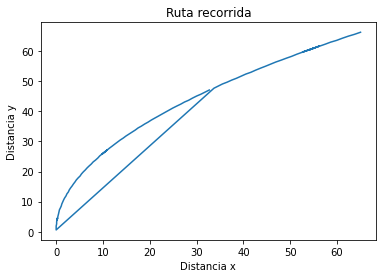

In [20]:
secuencia=salida[0]
for i in range(len(secuencia)):
    ciudades=secuencia[i]
    coord=Coordenadas(ciudades)
    plt.plot(coord[:, 0], coord[:,1])
    plt.xlabel('Distancia x')
    plt.ylabel('Distancia y')
    plt.title('Ruta recorrida')
    plt.show()
    clear_output(wait=True)


In [21]:
print(salida[0][-1])

[70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60. 59. 58. 57. 56. 55. 54. 53.
 52. 51. 50. 49. 48. 47. 46. 45. 44. 43. 42. 41. 38. 39. 40. 37. 36. 35.
 34. 33. 32. 31. 30. 29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17.
 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  5.  6.  4.  3.  2.  1.  0. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 92.
 90. 91. 89. 93. 94. 95. 96. 97. 98. 99.]


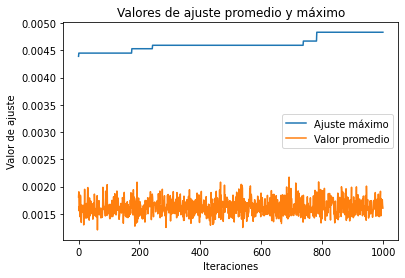

Valor maximo:  0.004832976184061757 Valor minimo:  0.004390823344474906 Distancia mínima:  206.91184105103002 Distancia máxima:  227.7477187184785


In [22]:
valoresMaximos=salida[1] #El elemento 1 son los ajustes de todas las iteraciones, mejores o iguales. 
valoresPromedio=salida[2]
plt.plot(valoresMaximos, label='Ajuste máximo')
plt.plot(valoresPromedio,label='Valor promedio')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de ajuste')
plt.title('Valores de ajuste promedio y máximo')
plt.legend(loc='best')
plt.show()
print('Valor maximo: ', np.max(valoresMaximos),'Valor minimo: ', np.min(valoresMaximos), 'Distancia mínima: ', 1/np.max(valoresMaximos),
     'Distancia máxima: ', 1/np.min(valoresMaximos))

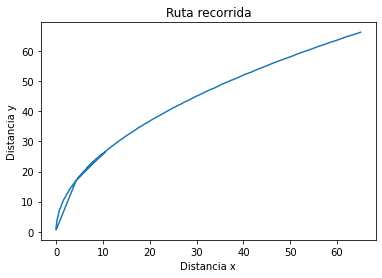

In [23]:
#Esta es la grafica del camino inicial
ciudades=salida[0][0]
coord=Coordenadas(ciudades)
plt.plot(coord[:, 0], coord[:,1])
plt.xlabel('Distancia x')
plt.ylabel('Distancia y')
plt.title('Ruta recorrida')
plt.show()
clear_output(wait=True) 